In [248]:
Y = [1, 5, 2]
ksi = [(1, 0), (0, 1), (1, 1)]
#Y = [1, 1, 2]
#ksi = [(1, 0), (0, 1), (1, 5)]

In [249]:
import numpy as np
from scipy.stats import uniform, norm, t, f, kstest
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def make_regression(ksi, Y):
    Psi = np.array(ksi)
    Y = np.array(Y)
    F = np.dot(Psi.transpose(), Psi)
    F_1 = np.linalg.inv(F)
    betta_est = np.dot(np.dot(F_1, Psi.transpose()), Y)
    e = np.dot(Psi, betta_est) - Y

    return betta_est, e, F
    
    

In [250]:
def ridge(Y, ksi):
    CVSS = []
    k = []
    
    ksi = np.array(ksi)
    Y = np.array(Y)
    Psi = np.array(ksi)
    
    z = np.arange(0, 10, 0.1)
    
    for j in range(len(z)):
        dots = []
        CVSS_i = []
        for i in range(len(Y)):
            Psi0 = np.delete(Psi, i, 0)
            Y0 = np.delete(Y, i, 0)
            L = lambda b: np.dot((Y0 - np.dot(Psi0, b)).transpose(), Y0 - np.dot(Psi0, b)) + \
            z[j] * np.dot(b.transpose(), b)
            dot = minimize(L, np.array([0, 0])).x
            e = Y[i] - np.dot(Psi0, dot)
            CVSS_i.append(np.dot(e.transpose(), e))
        CVSS.append(sum(CVSS_i))
        k.append(z[j])
    return k, CVSS

In [251]:
x, y = ridge(Y, ksi)

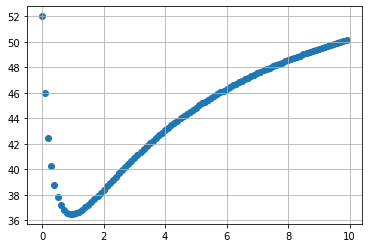

In [252]:
plt.scatter(x, y)
plt.grid(True)

In [253]:
def result_ridge():
    lambda0 = 1.86
    Psi = np.array(ksi)
    L = lambda b: np.dot((Y - np.dot(Psi, b)).transpose(), Y - np.dot(Psi, b)) + \
                lambda0 * np.dot(b.transpose(), b)
    dot = minimize(L, np.array([0, 0])).x
    
    print("Коэффициенты ridge регрессии:")
    print(dot)
    print("Параметр регуляризации: lambda0 =", lambda0)

In [254]:
def lasso(Y, ksi):
    CVSS = []
    k = []
    
    ksi = np.array(ksi)
    Y = np.array(Y)
    Psi = np.array(ksi)
    
    z = np.arange(0, 10, 0.1)
    
    for j in range(len(z)):
        dots = []
        CVSS_i = []
        for i in range(len(Y)):
            Psi0 = np.delete(Psi, i, 0)
            Y0 = np.delete(Y, i, 0)
            L = lambda b: np.dot((Y0 - np.dot(Psi0, b)).transpose(), Y0 - np.dot(Psi0, b)) + \
            z[j] * sum([abs(bi) for bi in b])
            dot = minimize(L, np.array([0, 0])).x
            e = Y[i] - np.dot(Psi0, dot)
            CVSS_i.append(np.dot(e.transpose(), e))
        CVSS.append(sum(CVSS_i))
        k.append(z[j])
    return k, CVSS

In [255]:
xl, yl = lasso(Y, ksi)

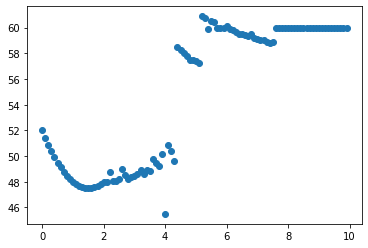

In [256]:
plt.scatter(xl, yl)

In [257]:
def result_lasso():
    lambda0 = 4
    Psi = np.array(ksi)
    L = lambda b: np.dot((Y - np.dot(Psi, b)).transpose(), Y - np.dot(Psi, b)) + \
                lambda0 * sum([abs(bi) for bi in b])
    dot = minimize(L, np.array([0, 0])).x
    
    print("Коэффициенты lasso регрессии:")
    print(dot)
    print("Параметр регуляризации: lambda0 =", lambda0)

In [258]:
result_lasso()

Коэффициенты lasso регрессии:
[-2.87014785e-09  2.43726446e+00]
Параметр регуляризации: lambda0 = 4


In [259]:
result_ridge()

Коэффициенты ridge регрессии:
[0.32950586 1.72810727]
Параметр регуляризации: lambda0 = 1.86


In [260]:
betta_est, e, F = make_regression(ksi, Y)
print(betta_est)

[-0.33333333  3.66666667]


In [236]:
print(F)

[[ 2  5]
 [ 5 26]]


In [237]:
print(ksi)

[(1, 0), (0, 1), (1, 5)]
